## Data Set Information

### Overview

- **1556** rows mutivariates.

- $y = \,\text{not_paid}$

- $y \in \{0,1\}$

- Direct correlations: $x \rightarrow y\,|\,x=\text{purpose}$. Ex: $\text{Grace Period}=True\,|\,x=\text{credit_card}\,,\,y=1$

### Columns

1. ` `: It is unamed column which indicate actual line numbers from original dataset.

2. `initial_list_status`: Loan status, *w* (whole) and *f* (factional).

    - *Whole loans*: Loans owned by multiple tenants. Onw possible flow is bank loans to third party lender, then bank immediately received their money back with intereset, then lender develop custom loans for broad range group of loaners with fixed interest. Ex: Home Ownership Loan, Auto Loans, etc.
    
    - *Fractional loans*: Similar to Whole loans, but goods owned by loaner treated as sharable goods. It's means loaner could breaking their goods into smaller goods, then shared them to another loaner. Ex: Hotel Renting, Vacations, etc.

In other word, *fractional loans* is alternative to *whole loans*. *Whole loans* is group financing, but *fractional loans* reduced the risk by implementing shared goods with higher interest. Read [this](https://www.stimmel-law.com/en/articles/tics-and-fractional-loans-easier-and-easier-own-tics) and [this](https://www.mortgageloan.com/fractional-mortgages-1400) for more information.

3. `purpose`: The purpose of loans. There are 5 categories: *credit_card*, *debt_consolidation*, *home_improvement*, *major_purchase*, and *small_business*.

4. `int_rate`: Interest rate in percentage.

5. `installment`: Monthly payment.

6. `annual_inc`: Annual loaner's income.

7. `dti`: *Date to Income* ratio. Read [this](https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/) for further decription. Lower the dti, lower the loaner risk to lender. Please read [this](https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/) for further explanation.

8. `verification_status`: Status of loaner's income verification. There are 3 categories: *verified*, *not_verified*, and *source verified*.

9. `grade`: Bank system defined grade of loan.

10. `revol_bal`: Total credit in *revolving balance* or unpaid credits.

11. `inq_last_12m`: Total credit/loans at lasth 12th month.

12. `delinq_2yrs`: Total delayed credit payments within last 2 years for loaners who take credits in 30+ months.

13. `home_ownership`: Home ownership category. There are 3 categories: *MORTGAGE*, *OWN*, and *RENT*.

14. `log_inc`: $log(\text{annual_inc})$

15. `verified`: Verified is True (1) or False (0).

16. `grdCtoA`: Grade of credit, such as:

    $$\text{grdCtoA} = \begin{cases}
        1 & \text{if}\,\in\{A,B,C\}\\
        0 & \text{if}\,\notin\{A,B,C\}
    \end{cases}$$

## Data Analysis

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
import os
print('current directory', os.getcwd())

current directory /home/bladefidz/Codes/finhacks/2018/problem1


In [4]:
dataTrain = pd.read_csv('dataset1/train1.csv')
dataTrain.head()

,Unnamed: 0,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,1495,w,debt_consolidation,21.45,955.75,90000.0,20.91,Verified,D,23448,4,0,MORTGAGE,1,11.407565,1,0
1,266,w,debt_consolidation,18.06,289.47,65000.0,12.74,Source Verified,D,13362,2,0,MORTGAGE,1,11.082143,1,0
2,309,w,home_improvement,9.44,838.91,97400.0,12.64,Source Verified,B,2372,1,0,MORTGAGE,1,11.486581,1,1
3,239,w,home_improvement,10.42,214.55,60000.0,2.38,Not Verified,B,4705,2,0,OWN,0,11.002100,0,1
4,136,f,debt_consolidation,11.99,1024.52,150000.0,20.84,Not Verified,B,14342,0,0,MORTGAGE,0,11.918391,0,1


In [7]:
print("Training data row count", len(dataTrain))
print("Ratio to original row count", len(dataTrain)/1556)

Training data row count 1244
Ratio to original row count 0.7994858611825193


In [24]:
notPaidLoans = dataTrain[dataTrain['not_paid']==1]
notPaidLoans.pop('not_paid')
print("Not paid loans count", len(notPaidLoans))

Not paid loans count 627


In [25]:
paidLoans = dataTrain[dataTrain['not_paid']==0]
paidLoans.pop('not_paid')
print("Paid loans count", len(paidLoans))

Paid loans count 617


In [28]:
print("Dataset class balance ratio", len(paidLoans)/len(notPaidLoans))

Dataset class balance ratio 0.9840510366826156


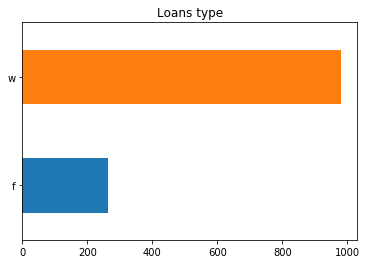

In [93]:
dataTrain['initial_list_status'].value_counts().sort_values().plot(
    x='category', y='frequency', kind='barh', title='Loans type')

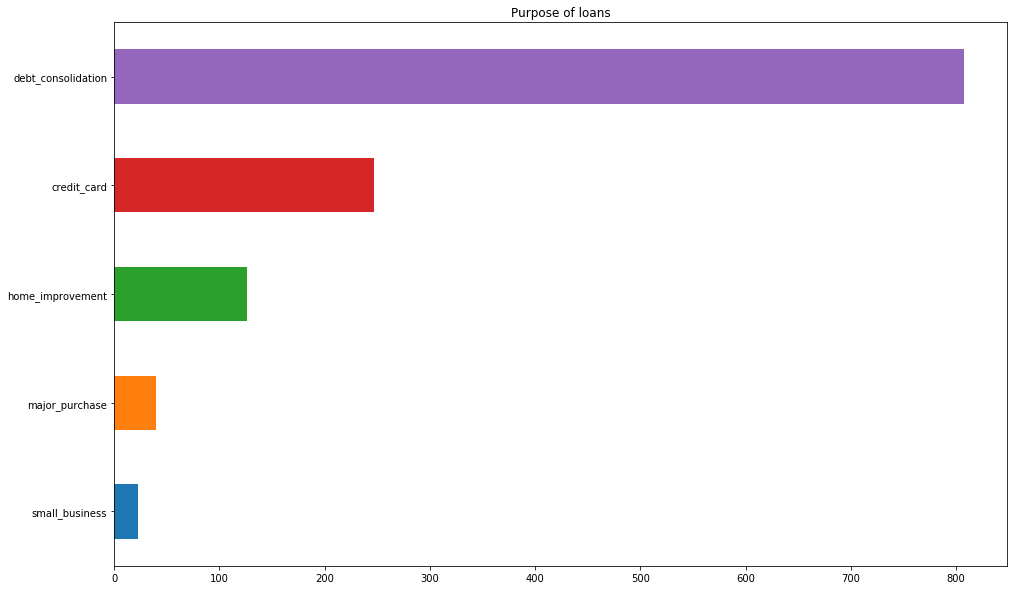

In [92]:
dataTrain['purpose'].value_counts().sort_values().plot(
    x='category', y='frequency', kind='barh', title='Purpose of loans', figsize=(16,10))

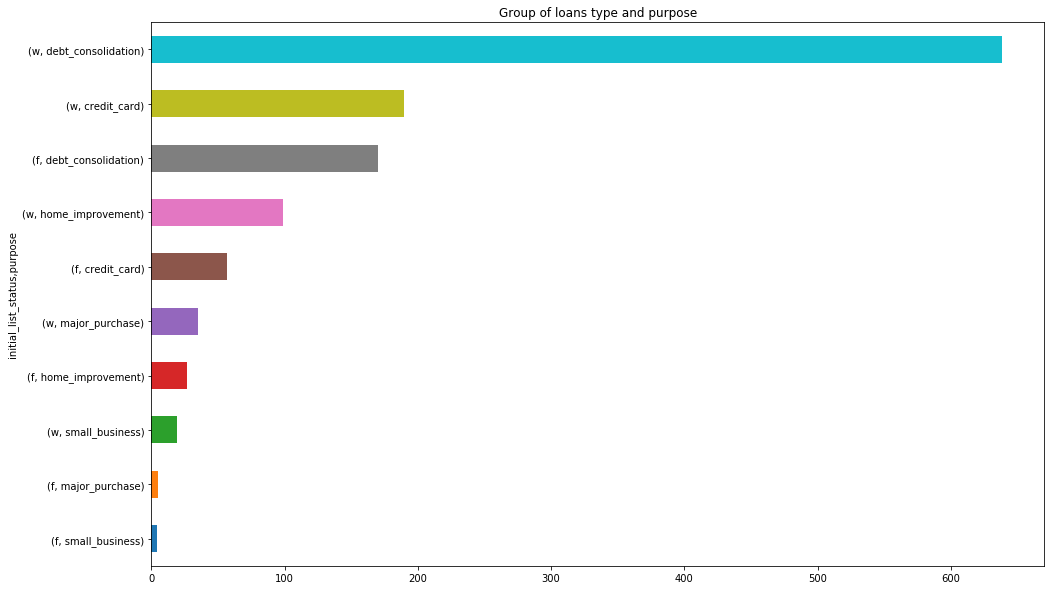

In [90]:
dataTrain.groupby(['initial_list_status', 'purpose']).size().sort_values().plot.barh(
        title="Group of loans type and purpose",
        figsize=(16,10))

In [137]:
dtiClass = np.linspace(0, dataTrain['dti'].max(), 5)
print(dtiClass)

[  0.      28.9625  57.925   86.8875 115.85  ]


In [143]:
dataTrain['dti_class'] = pd.cut(dataTrain['dti'], dtiClass)
dataTrain['dti_class'].head()

0    (0.0, 28.962]
1    (0.0, 28.962]
2    (0.0, 28.962]
3    (0.0, 28.962]
4    (0.0, 28.962]
Name: dti_class, dtype: category
Categories (4, interval[float64]): [(0.0, 28.962] < (28.962, 57.925] < (57.925, 86.887] < (86.887, 115.85]]

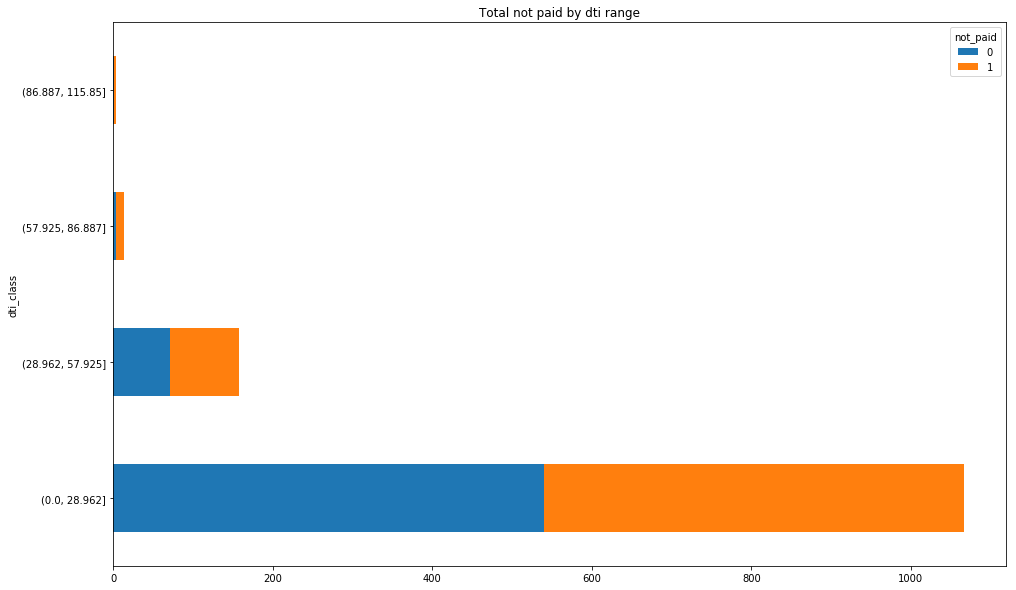

In [144]:
dataTrain.groupby(
    ['dti_class', 'not_paid']
    )['dti_class'].size().unstack(
        'not_paid'
    ).plot.barh(
        figsize=(16,10),
        title="Total not paid by dti range",
        stacked=True)

In [146]:
print("Max annual_inc", dataTrain['annual_inc'].max())
print("Min annual_inc", dataTrain['annual_inc'].min())

Max annual_inc 1200000.0
Min annual_inc 3000.0


In [122]:
annualIncRange = dataTrain['annual_inc'].max() - dataTrain['annual_inc'].min()
print('Annual income range', annualIncRange)

Annual income range 1197000.0


In [125]:
sturgesRule = 1 + math.log(dataTrain['annual_inc'].count(), 10)
numClass = int(sturgesRule)
print('Number of classes of Annual income', numClass)

Number of classes 4


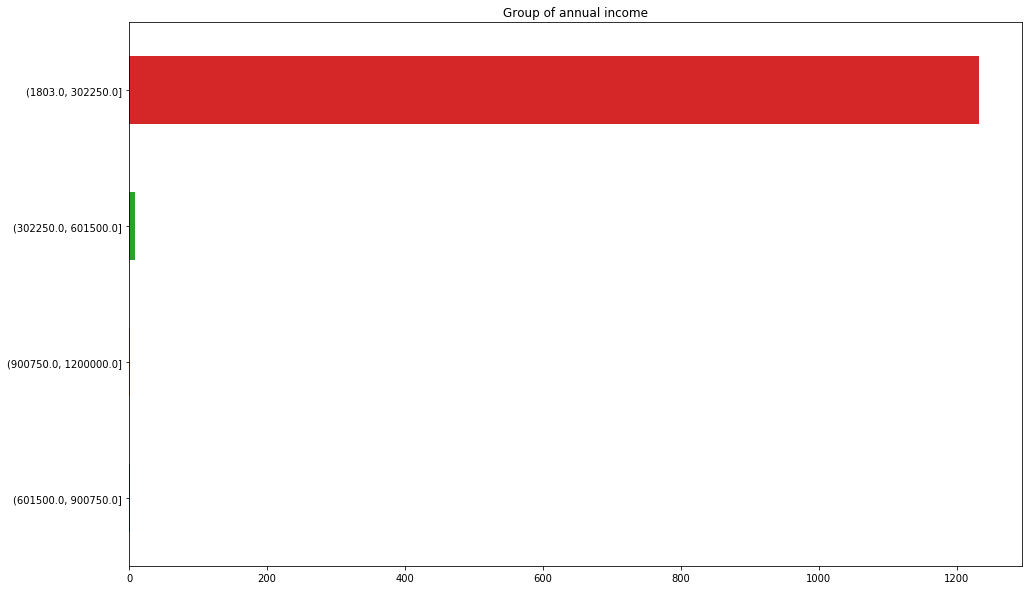

In [148]:
dataTrain['annual_inc_class'] = pd.cut(dataTrain['annual_inc'], bins=numClass)
dataTrain['annual_inc_class'].value_counts().sort_values().plot(
    x='Annual income', y='frequency', kind='barh', title='Group of annual income', figsize=(16,10))

In [151]:
print("Max revol_bal", dataTrain['revol_bal'].max())
print("Min revol_bal", dataTrain['revol_bal'].min())

Max revol_bal 258897
Min revol_bal 0


In [152]:
revolBalClass = np.linspace(0, dataTrain['revol_bal'].max(), 5)
print(revolBalClass)

[     0.    64724.25 129448.5  194172.75 258897.  ]


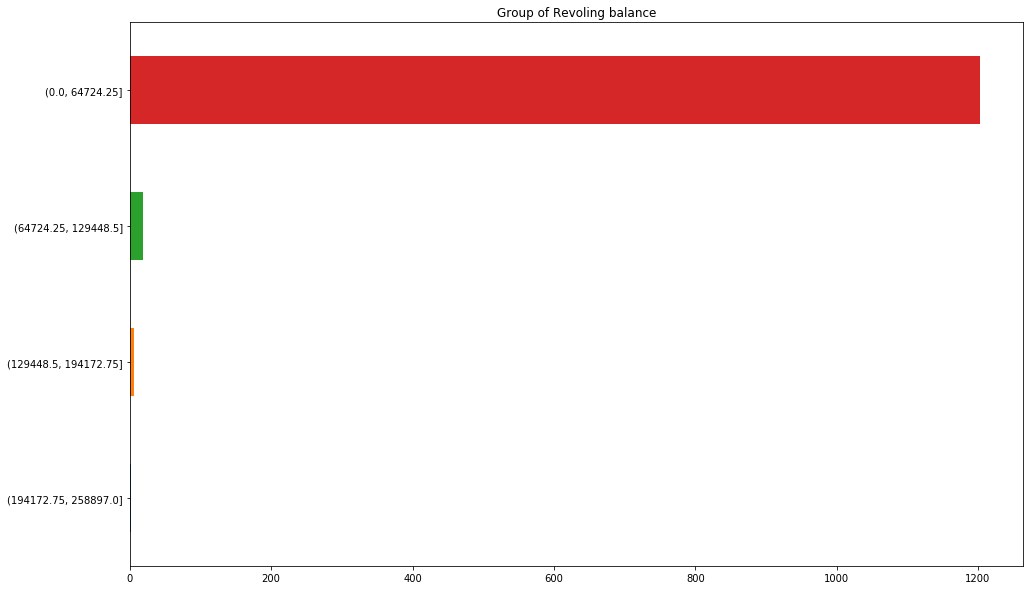

In [153]:
dataTrain['revol_bal_class'] = pd.cut(dataTrain['revol_bal'], bins=revolBalClass)
dataTrain['revol_bal_class'].value_counts().sort_values().plot(
    x='Revoling balance', y='frequency', kind='barh', title='Group of Revoling balance', figsize=(16,10))

In [180]:
dataTrain.groupby(
    ['annual_inc_class', 'revol_bal_class']
    )['annual_inc_class'].size()

annual_inc_class       revol_bal_class      
(1803.0, 302250.0]     (0.0, 64724.25]          1196
                       (64724.25, 129448.5]       17
                       (129448.5, 194172.75]       4
                       (194172.75, 258897.0]       1
(302250.0, 601500.0]   (0.0, 64724.25]             5
                       (64724.25, 129448.5]        1
                       (129448.5, 194172.75]       1
                       (194172.75, 258897.0]       1
(601500.0, 900750.0]   (0.0, 64724.25]             1
(900750.0, 1200000.0]  (0.0, 64724.25]             1
                       (129448.5, 194172.75]       1
Name: annual_inc_class, dtype: int64

In [5]:
subSet = dataTrain.loc[:, ['annual_inc', 'revol_bal']]
subSet = subSet[subSet['annual_inc'] <= 302250.0]
subSet = subSet[subSet['revol_bal'] <= 64724.25]
subSet.describe()

,annual_inc,revol_bal
count,1211.000000,1211.000000
mean,75639.333254,12872.312139
std,43444.495236,11633.402503
min,3000.000000,0.000000
25%,46294.500000,4629.000000
50%,65000.000000,9780.000000
75%,92172.500000,17183.500000
max,300000.000000,63723.000000


In [6]:
subSet['annual_inc_class'] = pd.cut(subSet['annual_inc'], bins=12)

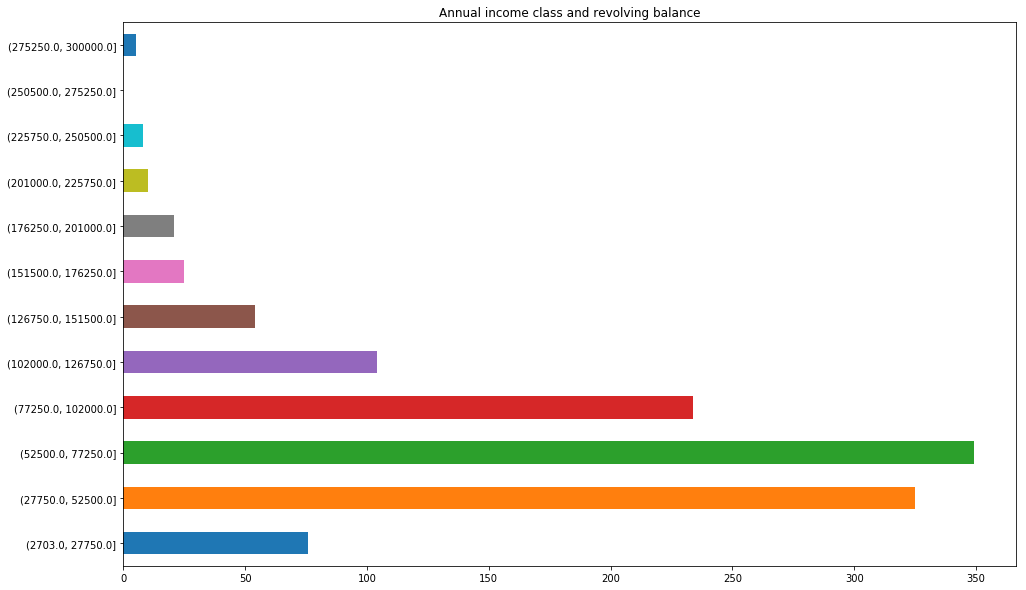

In [13]:
subSet['annual_inc_class'].value_counts().sort_index().plot(x='annual_inc_class', y='revol_bal',
    kind='barh',
    title='Annual income class and revolving balance', figsize=(16,10))

In [16]:
purposeNotPaid = dataTrain.query("not_paid==1").groupby(
    ['purpose', 'not_paid']
    )['purpose'].size()

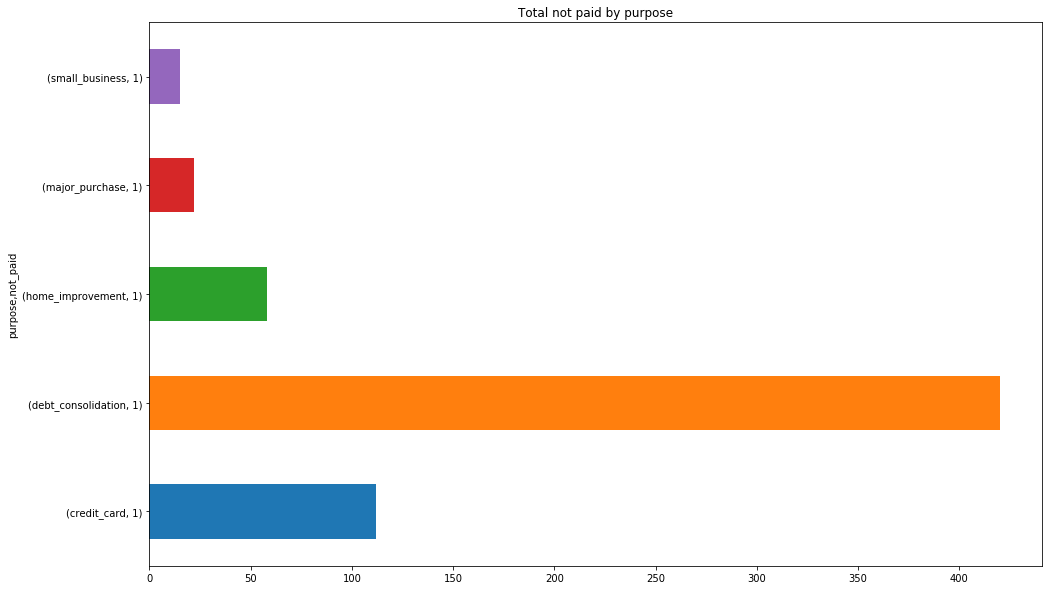

In [17]:
purposeNotPaid.plot.barh(
        figsize=(16,10),
        title="Total not paid by purpose",
        stacked=True)

In [18]:
purposeNotPaid

purpose             not_paid
credit_card         1           112
debt_consolidation  1           420
home_improvement    1            58
major_purchase      1            22
small_business      1            15
Name: purpose, dtype: int64

## Machine Learning Modeling